<a href="https://colab.research.google.com/github/Tako07/fundamentos_nlp/blob/master/estadistica_en_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#nos permite hacer visualizaciones interactivas
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

# Bi-gramas


*   Parejas de palabras que ocurren consecutivas



In [24]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

In [25]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

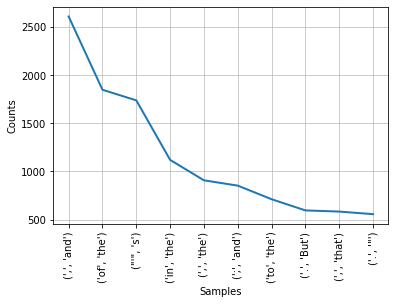

In [26]:
fdist.plot(10)

# Filtrado de bi-gramas


*   En el gráfico se puede ver que los bi-gramas más comunes no respresentan frases de verdadero interés
*   Se pueden aplicar filtros que nos permitan ver estructuras más relevantes



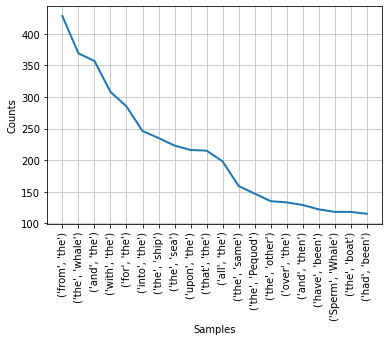

In [27]:
threshold = 2
filtered_bigrams = [bigram 
                    for bigram in md_bigrams 
                    if len(bigram[0])>threshold and len(bigram[1])>threshold
                    ]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

# Tri-gramas

In [28]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

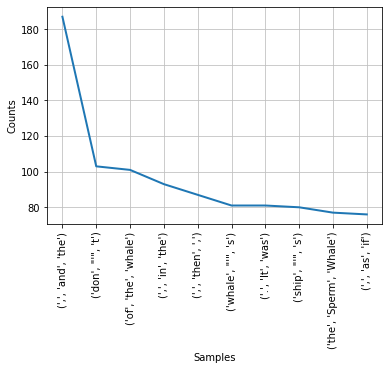

In [29]:
fdist.plot(10)

# Colocaciones (Collocations)


*   Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una frecuencia inusualmente alta
*   Las colocaciones de una palabra son declaraciones formales de dónde suele hubicarse tipicamente esa palabra



In [30]:
md_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigram 
                    for bigram in md_bigrams 
                    if len(bigram[0]) > threshold and len(bigram[1]) > threshold
                    ]
filtered_bigram_dist = FreqDist(filtered_bigrams)

filtered_words = [word for word in text1 if len(word) > threshold]
filtered_word_dist = FreqDist(filtered_words)

#Data Frame
df = pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])

In [31]:
df

bi_grams  word_0  ... word_0_freq  word_1_freq
0             (mild, palms)    mild  ...          28           15
1         (braced, against)  braced  ...           2          132
2           (own, thoughts)     own  ...         205           34
3           (her, bulwarks)     her  ...         329           36
4             (coming, any)  coming  ...          50          320
...                     ...     ...  ...         ...          ...
67937  (this, soliloquizer)    this  ...        1280            1
67938         (body, being)    body  ...         110          219
67939          (with, corn)    with  ...        1659            5
67940      (that, strictly)    that  ...        2982            5
67941         (awful, fear)   awful  ...          18           32

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [32]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1] * x.values[2])), axis=1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

bi_grams  word_0  ...        PMI  log(bi_gram_freq)
0             (mild, palms)    mild  ...  -8.714246                0.0
1         (braced, against)  braced  ...  -8.044394                0.0
2           (own, thoughts)     own  ... -11.766943                1.0
3           (her, bulwarks)     her  ... -12.531869                1.0
4             (coming, any)  coming  ... -13.965784                0.0
...                     ...     ...  ...        ...                ...
67937  (this, soliloquizer)    this  ... -10.321928                0.0
67938         (body, being)    body  ... -14.556147                0.0
67939          (with, corn)    with  ... -13.018026                0.0
67940      (that, strictly)    that  ... -13.863993                0.0
67941         (awful, fear)   awful  ...  -9.169925                0.0

[67942 rows x 8 columns]

In [33]:
df.sort_values(by='PMI', ascending=False)

bi_grams       word_0  ...        PMI  log(bi_gram_freq)
33164     (pealing, exultation)      pealing  ...   0.000000                0.0
18185  (substantive, deformity)  substantive  ...   0.000000                0.0
18782       (trover, litigated)       trover  ...   0.000000                0.0
8602        (pasteboard, masks)   pasteboard  ...   0.000000                0.0
36641       (exercises, boasts)    exercises  ...   0.000000                0.0
...                         ...          ...  ...        ...                ...
41849                (man, the)          man  ... -22.732783                0.0
2457                (some, the)         some  ... -22.919024                0.0
23573                (one, the)          one  ... -23.540138                0.0
44283                (the, not)          the  ... -23.851315                0.0
42568                (the, but)          the  ... -23.864336                0.0

[67942 rows x 8 columns]

In [34]:
fig = px.scatter(x=df['PMI'].values, y=df['log(bi_gram_freq)'].values, color=df['PMI']+df['log(bi_gram_freq)'],
                 hover_name=df['bi_grams'].values, width=600, height=600, labels={'x':'PMI', 'y': 'Log(Bigram frequency'})
fig.show()

# Medidas pre-construidas en NLTK

In [35]:
from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [36]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Textos en español

In [37]:
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
flatten_corpus = [w for l in corpus for w in l ]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [38]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [39]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]